# Review of available animation commands {#animate_results}

This example lists the different commands available for creating
animations of transient results, shown with the arguments available.


DPF Model
------------------------------
Transient analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  velocity: Nodal Velocity      
     -  acceleration: Nodal Acceleration
     -  reaction_force: Nodal Force   
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  elastic_strain: ElementalNodal Strain
------------------------------
DPF  Meshed Region: 
  393 nodes 
  40 elements 
  Unit: m 
  With solid (3D) elements
------------------------------
DPF  Time/Freq Support: 
  Number of sets: 20 
Cumulative     Time (

Orient the view, then press "a" to produce an animation


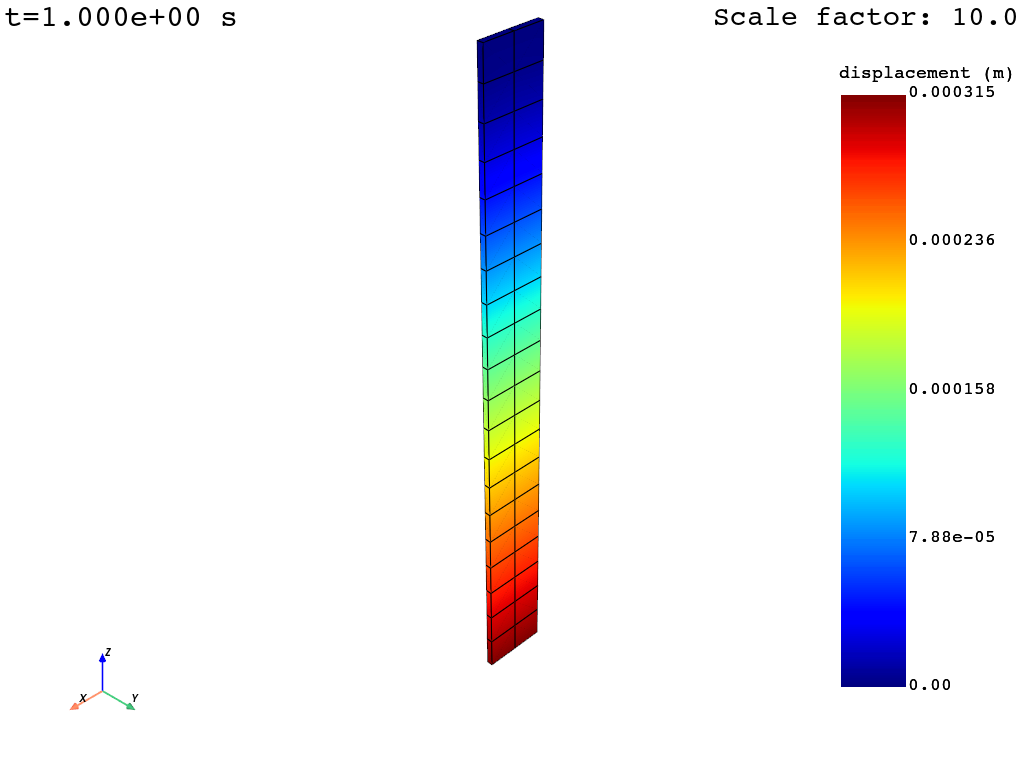

In [1]:
from ansys.dpf import core as dpf
from ansys.dpf.core import examples


# Load the model
model = dpf.Model(examples.find_msup_transient())
print(model)

# Use Scoping instances to adjust the region and the steps involved.
# Create a scoping on all nodes
mesh_scoping = dpf.mesh_scoping_factory.nodal_scoping(model.metadata.meshed_region.nodes.scoping)
# Create a scoping on all time steps
time_scoping = dpf.time_freq_scoping_factory.scoping_on_all_time_freqs(model)

# Instantiate operators of interest and scope them
displacement_op = model.results.displacement
displacement_op = displacement_op.on_time_scoping(time_scoping)
displacement_op = displacement_op.on_mesh_scoping(mesh_scoping)
stress_op = model.results.stress
stress_op = stress_op.on_time_scoping(time_scoping)
stress_op = stress_op.on_mesh_scoping(mesh_scoping)

# Get the resulting fields container
displacement_fields = displacement_op.eval()
stress_fields = stress_op.eval()

# Animate a fields container by going through the fields and plotting contours
# of the norm or of the selected component.
# Default behavior consists in:
# - Using a constant and uniform scale factor of 1.0
# - Showing the deformed geometry based on the fields themselves if they are nodal 3D vector fields.
# displacement_fields.animate()
# - Showing the static geometry if the fields are not nodal 3D vector fields.
# stress_fields.animate()

# One can deactivate by default animation by self using deform_by=False
# displacement_fields.animate(deform_by=False)

# Change the scale factor using a number/a list of numbers for a uniform constant/varying scaling.
# displacement_fields.animate(deform_by=True, scale_factor=10.,
#                             show_axes=True)
# varying_scale_factor = [i for i in range(len(displacement_fields))]
# displacement_fields.animate(deform_by=True, scale_factor=varying_scale_factor,
#                             show_axes=True)

# One can also format the frequency legend.
# displacement_fields.select_component(0).animate(deform_by=displacement_fields, scale_factor=1.,
#                                                 show_axes=True,
#                                                 freq_kwargs={"font_size": 12,
#                                                              "fmt": ".3"})

# The deform_by argument can be:
# - a FieldsContainer of nodal 3D vectorial length fields
# stress_fields.animate(deform_by=model.results.displacement.on_all_time_freqs.eval())
# - a Result giving nodal 3D vectorial length fields
# stress_fields.animate(deform_by=model.results.displacement.on_all_time_freqs())
# - an Operator which outputs nodal 3D vectorial length fields
# stress_fields.animate(deform_by=model.results.displacement.on_all_time_freqs)
# It must evaluate to a FieldsContainer of same length as the one being animated.

# Save the animation using "save_as" with a target path with the desired format as extension.
# (accepts .gif, .avi or .mp4, see pyvista.Plotter.open_movie)
camera_pos = displacement_fields.animate(
    scale_factor=10.0,
    save_as="06-animate_results.gif",
    return_cpos=True,
    show_axes=True,
)

# Can be made off_screen for batch animation creation.
# This accepts as kwargs arguments taken by pyvista.Plotter.open_movie such as the frame-rate and
# the quality.

# One can also define a camera position to use, which can take a list of Camera descriptions:
# Camera description must be one of the following:
#
# Iterable containing position, focal_point, and view up.  For example:
# [(2.0, 5.0, 13.0), (0.0, 0.0, 0.0), (-0.7, -0.5, 0.3)]
#
# Iterable containing a view vector.  For example:
# [-1.0, 2.0, -5.0]
#
# A string containing the plane orthogonal to the view direction.  For example:
# 'xy'

# import copy
# camera_pos_list = []
# init_pos = [(1.1710286191854873, 1.1276044794551632, 1.62102216127818),
#             (0.05000000000000724, 0.006575860269683119, 0.4999935420927001),
#             (0.0, 0.0, 1.0)]
# camera_pos_list.append(init_pos)
# for i in range(1, len(displacement_fields)):
#     new_pos = copy.copy(camera_pos_list[i-1])
#     new_pos[0] = (camera_pos_list[i-1][0][0],
#                   camera_pos_list[i-1][0][1]-0.2,
#                   camera_pos_list[i-1][0][2])
#     camera_pos_list.append(new_pos)
# displacement_fields.animate(scale_factor=10.,
#                             save_as="displacements_2.gif",
#                             framerate=4,
#                             quality=8,
#                             cpos=camera_pos_list,
#                             off_screen=True,
#                             show_axes=True)